# K-Means Clustering in Python with scikit-learn
Learn about the inner workings of the K-Means clustering algorithm with an interesting case study.

In Machine Learning, the types of Learning can broadly be classified into three types: 1. Supervised Learning, 2. Unsupervised Learning and 3. Semi-supervised Learning. Algorithms belonging to the family of Unsupervised Learning have no variable to predict tied to the data. Instead of having an output, the data only has an input which would be multiple variables that describe the data. This is where clustering comes in.

Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects. Clustering is mainly used for exploratory data mining. It has manifold usage in many fields such as machine learning, pattern recognition, image analysis, information retrieval, bio-informatics, data compression, and computer graphics.

However, this post tries to unravel the inner workings of K-Means, a very popular clustering technique. There's also a very good [DataCamp post](https://www.datacamp.com/community/tutorials/k-means-clustering-r) on K-Means, which explains the types of clustering (hard and soft clustering), types of clustering methods (connectivity, centroid, distribution and density) with a case study. The algorithm will help you to tackle unlabeled datasets (i.e. the datasets that do not have any class-labels) and draw your own inferences from them with ease.

K-Means falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset. Centroid-based clustering is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.

In this post, you will learn about:
- The inner workings of the K-Means algorithm
- A simple case study in Python
- The disadvantages of K-Means

## The inner workings of the K-Means clustering algorithm:
To do this, you will need a sample dataset (training set):

|Objects|X|Y|Z|
|-------|-|-|-|
|OB-1   |1|4|1|
|OB-2   |1|2|2|
|OB-3   |1|4|2|
|OB-4   |2|1|2|
|OB-5   |1|1|1|
|OB-6   |2|4|2|
|OB-7   |1|1|2|
|OB-8   |2|1|1|

The sample dataset contains 8 objects with their X, Y and Z coordinates. Your task is to cluster these objects into two clusters (here you define the value of K (of K-Means) in essence to be 2).

So, the algorithm works by:

- Taking any two centroids or data points (as you took 2 as K hence the number of centroids also 2) in its account initially.
- After choosing the centroids, (say C1 and C2) the data points (coordinates here) are assigned to any of the Clusters (let’s take centroids = clusters for the time being) depending upon the distance between them and the centroids.
- Assume that the algorithm chose OB-2 (1,2,2) and OB-6 (2,4,2) as centroids and cluster 1 and cluster 2 as well.
- For measuring the distances, you take the following distance measurement function (also termed as similarity measurement function):

$$ d=|x2–x1|+|y2–y1|+|z2–z1| $$
        
This is also known as the Taxicab distance or Manhattan distance, where d is distance measurement between two objects, (x1,y1,z1) and (x2,y2,z2) are the X, Y and Z coordinates of any two objects taken for distance measurement.

Feel free to check out other distance measurement functions like Euclidean Distance, Cosine Distance etc.

The following table shows the calculation of distances (using the above distance measurement function) between the objects and centroids (OB-2 and OB-6): 

|Objects|X|Y|Z|Distance from C1(1,2,2)|Distance from C2(2,4,2)|
|-------|-|-|-|-----------------------|-----------------------|
|OB-1	|1|4|1|3	                  |2|
|OB-2	|1|2|2|0	                  |3|
|OB-3	|1|4|2|2	                  |1|
|OB-4	|2|1|2|2	                  |3|
|OB-5	|1|1|1|2	                  |5|
|OB-6	|2|4|2|3	                  |0|
|OB-7	|1|1|2|1	                  |4|
|OB-8	|2|1|1|3                	  |4|

The objects are clustered based on their distances between the centroids. An object which has a shorter distance between a centroid (say C1) than the other centroid (say C2) will fall into the cluster of C1. After the initial pass of clustering, the clustered objects will look something like the following:

|Cluster 1|Cluster 2|
|---------|---------|
|OB-2     |OB-1|
|OB-4     |OB-3|
|OB-5     |OB-6|
|OB-7     | |
|OB-8     | |

Now the algorithm will continue updating cluster centroids (i.e the coordinates) until they cannot be updated anymore (more on when it cannot be updated later). The updation takes place in the following manner:

\begin{equation*}
(\frac{\sum_{i-1}^n x_i}{n}),
(\frac{\sum_{i-1}^n y_i}{n}),
(\frac{\sum_{i-1}^n z_i}{n})
\end{equation*}

where $n$ = number of objects belonging to that particular cluster.

So, following this rule the updated cluster 1 will be ((1+2+1+1+2)/5, (2+1+1+1+1)/5,(2+2+1+2+1)/5) = (1.4,1.2,1.6). And for cluster 2 it will be ((1+1+2)/3, (4+4+4)/3, (1+2+2)/3) = (1.33, 4, 1.66).

After this, the algorithm again starts finding the distances between the data points and newly derived cluster centroids. So the new distances will be like following: 

|Objects|X|Y|Z|Distance from C1(1.4,1.2,1.6)|Distance from C2(1.33,4,1.66)|
|-------|-|-|-|-----------------------|-----------------------|
|OB-1	|1|4|1|3.8	                  |1|
|OB-2	|1|2|2|1.6	                  |2.66|
|OB-3	|1|4|2|3.6	                  |0.66|
|OB-4	|2|1|2|1.2	                  |4|
|OB-5	|1|1|1|1.2	                  |4|
|OB-6	|2|4|2|3.8	                  |1|
|OB-7	|1|1|2|1	                  |3.66|
|OB-8	|2|1|1|1.4                	  |4.33|

The new assignments of the objects with respect to the updated clusters will be: 

|Cluster 1|Cluster 2|
|---------|---------|
|OB-2     |OB-1|
|OB-4     |OB-3|
|OB-5     |OB-6|
|OB-7     | |
|OB-8     | |

This is where the algorithm no longer updates the centroids. Because there is no change in the current cluster formation, it is the same as the previous formation.

Now when, you are done with the cluster formation with K-Means you may apply it to some data the algorithm has not seen before (what you call a Test set). Let's generate that: 

|Objects|X|Y|Z|
|-------|-|-|-|
|OB-1   |2|4|1|
|OB-2   |2|2|2|
|OB-3   |1|2|1|
|OB-4   |2|2|1|

After applying K-means on the above dataset, the final clusters will be:

|Cluster 1|Cluster 2|
|---------|---------|
|OB-2     |OB-1|
|OB-3     | |
|OB-4     | |

Any application of an algorithm is incomplete if one is not sure about its performance. Now, in order to know how well the K-Means algorithm is performing there are certain metrics to consider. Some of these metrics are:

- Adjusted rand index
- Mutual information based scoring
- Homogeneity, completeness and v-measure

Now that you have got familiar with the inner mechanics of K-Means let's see K-Means live in action.

## A simple case study of K-Means in Python:
For the implementation part, you will be using the Titanic dataset (available here). Before proceeding with it, I would like to discuss some facts about the data itself. The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Now, talking about the dataset, the training set contains several records about the passengers of Titanic (hence the name of the dataset). It has 12 features capturing information about `passenger_class`, `port_of_Embarkation`, `passenger_fare` etc. The dataset's label is survival which denotes the survivial status of a particular passenger. Your task is to cluster the records into two i.e. the ones who survived and the ones who did not.

You might be thinking that since it is a labeled dataset, how could it be used for a clustering task? You just have to drop the 'survival' column from the dataset and make it unlabeled. It's the task of K-Means to cluster the records of the datasets if they survived or not.

For this tutorial, you will need the following Python packages: `pandas`, `NumPy`, `scikit-learn`, `Seaborn` and `Matplotlib`.

In [ ]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline

You have imported all the dependencies that you will need in this tutorial. Now, you will load the dataset.

In [ ]:
# Load the train and test datasets to create two DataFrames

train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

Let's preview the kind of data you will be working with by printing some samples from both the train and test DataFrames.

In [ ]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

You can get some initial statistics of both the train and test DataFrames using pandas' `describe()` method.

In [ ]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


***** Test_Set *****
       PassengerId      Pclass      

So, from the above outputs you definitely got to know about the features of the dataset and some basic statistics of it. I will list the feature names for you:

In [ ]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


It is very important to note that not all machine learning algorithms support missing values in the data that you are feeding to them. K-Means being one of them. So we need to handle the missing values present in the data. Let's first see where are the values missing:

In [ ]:
# For the train set
train.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
# For the test set
test.isna().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


Let's get the total number of missing values in both datasets.

In [ ]:
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


So, you can see in the training set, in the columns Age, Cabin and Embarked, there are missing values and in the test set, the Age and Cabin columns contain missing values.

There are a couple of ways to handle missing values:

- Remove rows with missing values
- Impute missing values

I prefer the latter one because if you remove the rows with missing values it can cause insufficiency in the data which in turn results in inefficient training of the machine learning model.

Now, there are several ways you can perform the imputation:

- A constant value that has meaning within the domain, such as 0, distinct from all other values.
- A value from another randomly selected record.
- A mean, median or mode value for the column.
- A value estimated by another machine learning model.

Any imputation performed on the train set will have to be performed on test data in the future when predictions are needed from the final machine learning model. This needs to be taken into consideration when choosing how to impute the missing values.

Pandas provides the `fillna()` function for replacing missing values with a specific value. Let's apply that with Mean Imputation.

In [ ]:
# Fill missing values with mean column values in the train set
train.fillna(train.mean(), inplace=True)

# Fill missing values with mean column values in the test set
test.fillna(test.mean(), inplace=True)

<ipython-input-9-33c3067c13b2>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(), inplace=True)
<ipython-input-9-33c3067c13b2>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.mean(), inplace=True)


Now that you have imputed the missing values in the dataset, it's time to see if the dataset still has any missing values.

For the training dataset:

In [ ]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Let's see if you have any missing values in the test set.

In [ ]:
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


Yes, you can see there are still some missing values in the Cabin and Embarked columns. This is because these values are non-numeric. In order to perform the imputation the values need to be in numeric form. There are ways to convert a non-numeric value to a numeric one. More on this later.

Let's do some more analytics in order to understand the data better. Understanding is really required in order to perform any Machine Learning task. Let's start with finding out which features are categorical and which are numerical.

- Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
- Continuous: Age, Fare. Discrete: SibSp, Parch.

Two features are left out which are not listed above in any of the categories. Yes, you guessed it right, Ticket and Cabin. Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric. Let see some sample values.

In [ ]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [ ]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

Let's see the survival count of passengers with respect to the following features:

- Pclass
- Sex
- SibSp
- Parch
- Let's do that one by one:

Survival count with respect to Pclass:

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Survival count with respect to Sex:

In [ ]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


You can see the survival rate of female passengers is significantly higher for males.

Survival count with respect to SibSp:

In [ ]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Now it's time for some quick plotting. Let's first plot the graph of "Age vs. Survived":

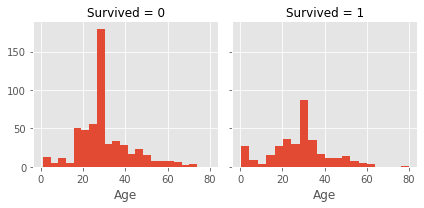

In [ ]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Its time to see how the Pclass and Survived features are related to eachother with a graph:

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


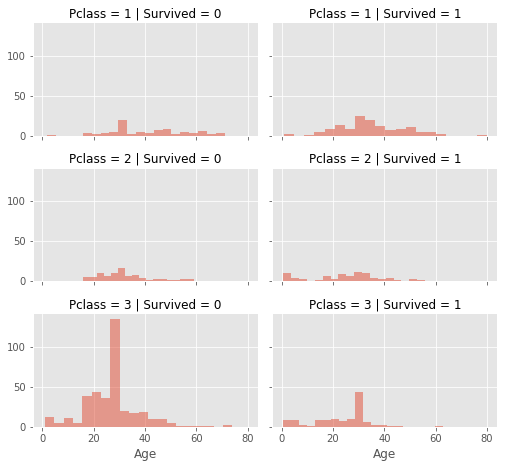

In [ ]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Enough of visualization and analytics for now! Let's actually build a K-Means model with the training set. But before that you will need some data preprocessing as well. You can see that not all the feature values are of same type. Some of them are numerical and some of them are not. In order to ease the computation, you will feed all numerical data to the model. Let's see the data types of different features that you have:

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


So, you can see that the following features are non-numeric:

- Name
- Sex
- Ticket
- Cabin
- Embarked

Before converting them into numeric ones, you might want to do some feature engineering, i.e. features like Name, Ticket, Cabin and Embarked do not have any impact on the survival status of the passengers. Often, it is better to train your model with only significant features than to train it with all the features, including unnecessary ones. It not only helps in efficient modelling, but also the training of the model can happen in much lesser time. Although, feature engineering is a whole field of study itself, I will encourage you to dig it further. But for this tutorial, know that the features Name, Ticket, Cabin and Embarked can be dropped and they will not have significant impact on the training of the K-Means model.

In [ ]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

Now that the dropping part is done let's convert the 'Sex' feature to a numerical one (only 'Sex' is remaining now which is a non-numeric feature). You will do this using a technique called [Label Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [ ]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [ ]:
# Let's investigate if you have non-numeric data left

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


Note that the test set does not have the Survived feature.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


**Brilliant!**

Looks like you are good to go to train your K-Means model now.

You can first drop the Survival column from the data with the `drop()` function.

In [ ]:
X = np.array(train.drop(['Survived'], 1).astype(float))

y = np.array(train['Survived'])

<ipython-input-44-f45639e93356>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(train.drop(['Survived'], 1).astype(float))


You can review all the features you are going to feed to the algorithm with `train.info()`.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


Let's now build the K-Means model.

In [ ]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(n_clusters=2)

You can see all the other parameters of the model other than `n_clusters`. Let's see how well the model is doing by looking at the percentage of passenger records that were clustered correctly.

In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


That is nice for the first go. Your model was able to cluster correctly with a 50% (accuracy of your model). But in order to enhance the performance of the model you could tweak some parameters of the model itself. I will list some of these parameters which the scikit-learn implementation of K-Means provides:

- algorithm
- max_iter
- n_jobs 

Let's tweak the values of these parameters and see if there is a change in the result.

In the [scikit-learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), you will find a solid information about these parameters which you should dig further.

In [ ]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(max_iter=600, n_clusters=2)

In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.49158249158249157


You can see a decrease in the score. One of the reasons being you have not scaled the values of the different features that you are feeding to the model. The features in the dataset contain different ranges of values. So, what happens is a small change in a feature does not affect the other feature. So, it is also important to scale the values of the features to a same range.

Let's do that now and for this experiment you are going to take `[0,1]` as the uniform value range across all the features.

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans.fit(X_scaled)

KMeans(max_iter=600, n_clusters=2)

In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6262626262626263


Great! You can see an instant 12% increase in the score.

So far you were able to load your data, preprocess it accordingly, do a little bit of feature engineering and finally you were able to make a K-Means model and see it in action.

Now, let's discuss K-Means's limitations.


## Disadvantages of K-Means
Now that you have a fairly good idea on how K-Means algorithm works let's discuss some its disadvantages.

The biggest disadvantage is that K-Means requires you to pre-specify the number of clusters (k). However, for the Titanic dataset, you had some domain knowledge available that told you the number of people who survived in the shipwreck. This might not always be the case with real world datasets. Hierarchical clustering is an alternative approach that does not require a particular choice of clusters. An additional disadvantage of k-means is that it is sensitive to outliers and different results can occur if you change the ordering of the data.

K-Means is a lazy learner where generalization of the training data is delayed until a query is made to the system. This means K-Means starts working only when you trigger it to, thus lazy learning methods can construct a different approximation or result to the target function for each encountered query. It is a good method for online learning, but it requires a possibly large amount of memory to store the data, and each request involves starting the identification of a local model from scratch.

## The latest development - HDBSCAN

HDBSCAN - Hierarchical Density-Based Spatial Clustering of Applications with Noise. Performs DBSCAN over varying epsilon values and integrates the result to find a clustering that gives the best stability over epsilon. This allows HDBSCAN to find clusters of varying densities (unlike DBSCAN), and be more robust to parameter selection.

In practice this means that HDBSCAN returns a good clustering straight away with little or no parameter tuning -- and the primary parameter, minimum cluster size, is intuitive and easy to select.

HDBSCAN is ideal for exploratory data analysis; it's a fast and robust algorithm that you can trust to return meaningful clusters (if there are any).

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 32.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700824 sha256=46da492cdcfb1d9da13c6fc3b27b2e69fec26aed1c7e984c6704f03e06a1c611
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


In [ ]:
import hdbscan
clusterer = hdbscan.HDBSCAN()
cluster_labels = clusterer.fit_predict(X)
cluster_labels

array([ 0, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,
       -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,
       -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0

In [ ]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
correct=0
for y_pred,y_true in zip(cluster_labels,y):
  if abs(y_pred) == y_true:
    correct += 1
print(correct/len(y))

0.6576879910213244


You can see HDBSCAN, even with the stock configurations, still beat k-means in terms of accuracy.

## Conclusion
So, in this tutorial you scratched the surface of one of the most popular clustering techniques - K-Means. You learned about its inner mechanics, implemented it using the Titanic Dataset in Python, and you also got a fair idea of its disadvantages. 

You can also check out a few other popular clustering methods [here](https://towardsdatascience.com/4-useful-clustering-methods-you-should-know-in-2021-ac61301e968e).